<a href="https://colab.research.google.com/github/ori112/penguins-species/blob/main/penguins_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [259]:
#reading project file
df = pd.read_csv(r'/content/penguins_size.csv')

In [260]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [261]:
#inspecting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [262]:
#summing null values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [263]:
#since there are low count of null values, dropping the null records
df = df.dropna(axis = 0)

In [264]:
#checking to see that all null values are dropped
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

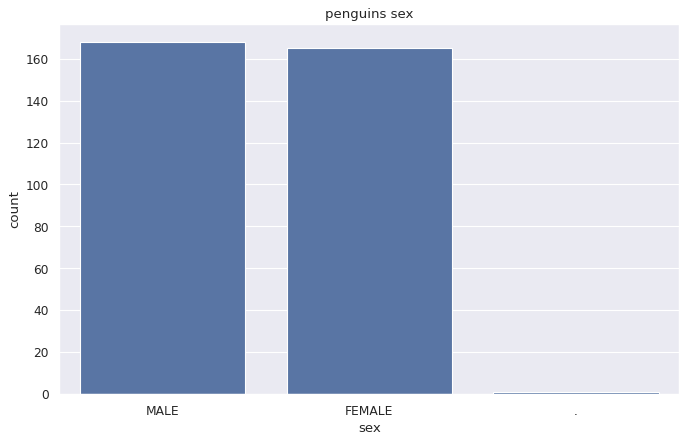

In [265]:
#examining sex categorial features
sns.set_theme(style = "darkgrid")
plt.figure(figsize = (10,6), dpi=80)
sns.countplot(data=df, x="sex")
plt.title("penguins sex")
plt.show()

In [266]:
#dropping records with no sex
df = df[df['sex'] != '.']

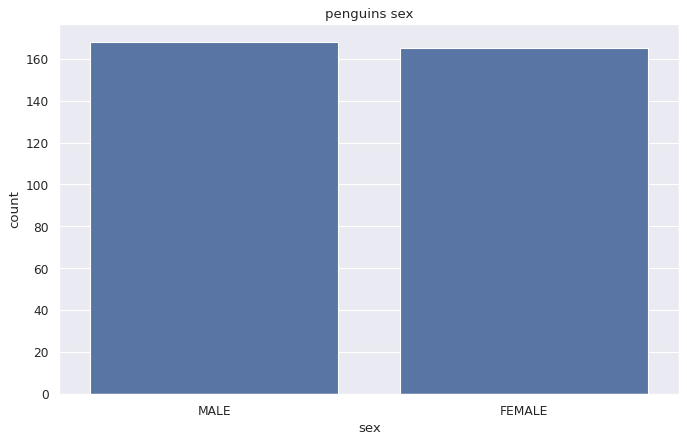

In [267]:
plt.figure(figsize = (10,6), dpi=80)
sns.countplot(data=df, x="sex")
plt.title("penguins sex")
plt.show()

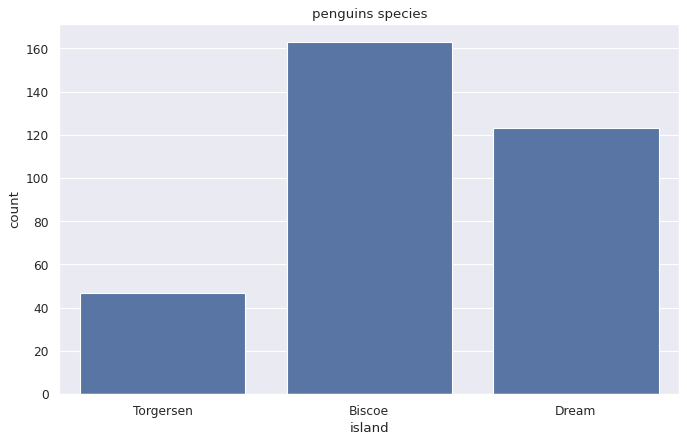

In [268]:
#examining island categorial feature
plt.figure(figsize = (10,6), dpi=80)
sns.countplot(data=df, x="island")
plt.title("penguins species")
plt.show()

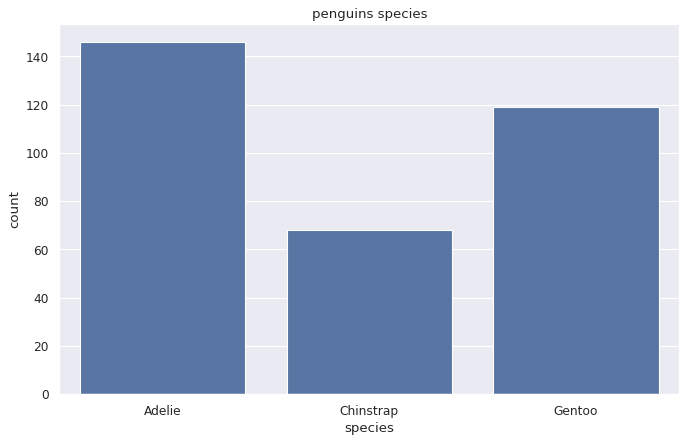

In [269]:
#examining target specices label
plt.figure(figsize = (10,6), dpi=80)
sns.countplot(data=df, x="species")
plt.title("penguins species")
plt.show()

<Figure size 1500x1000 with 0 Axes>

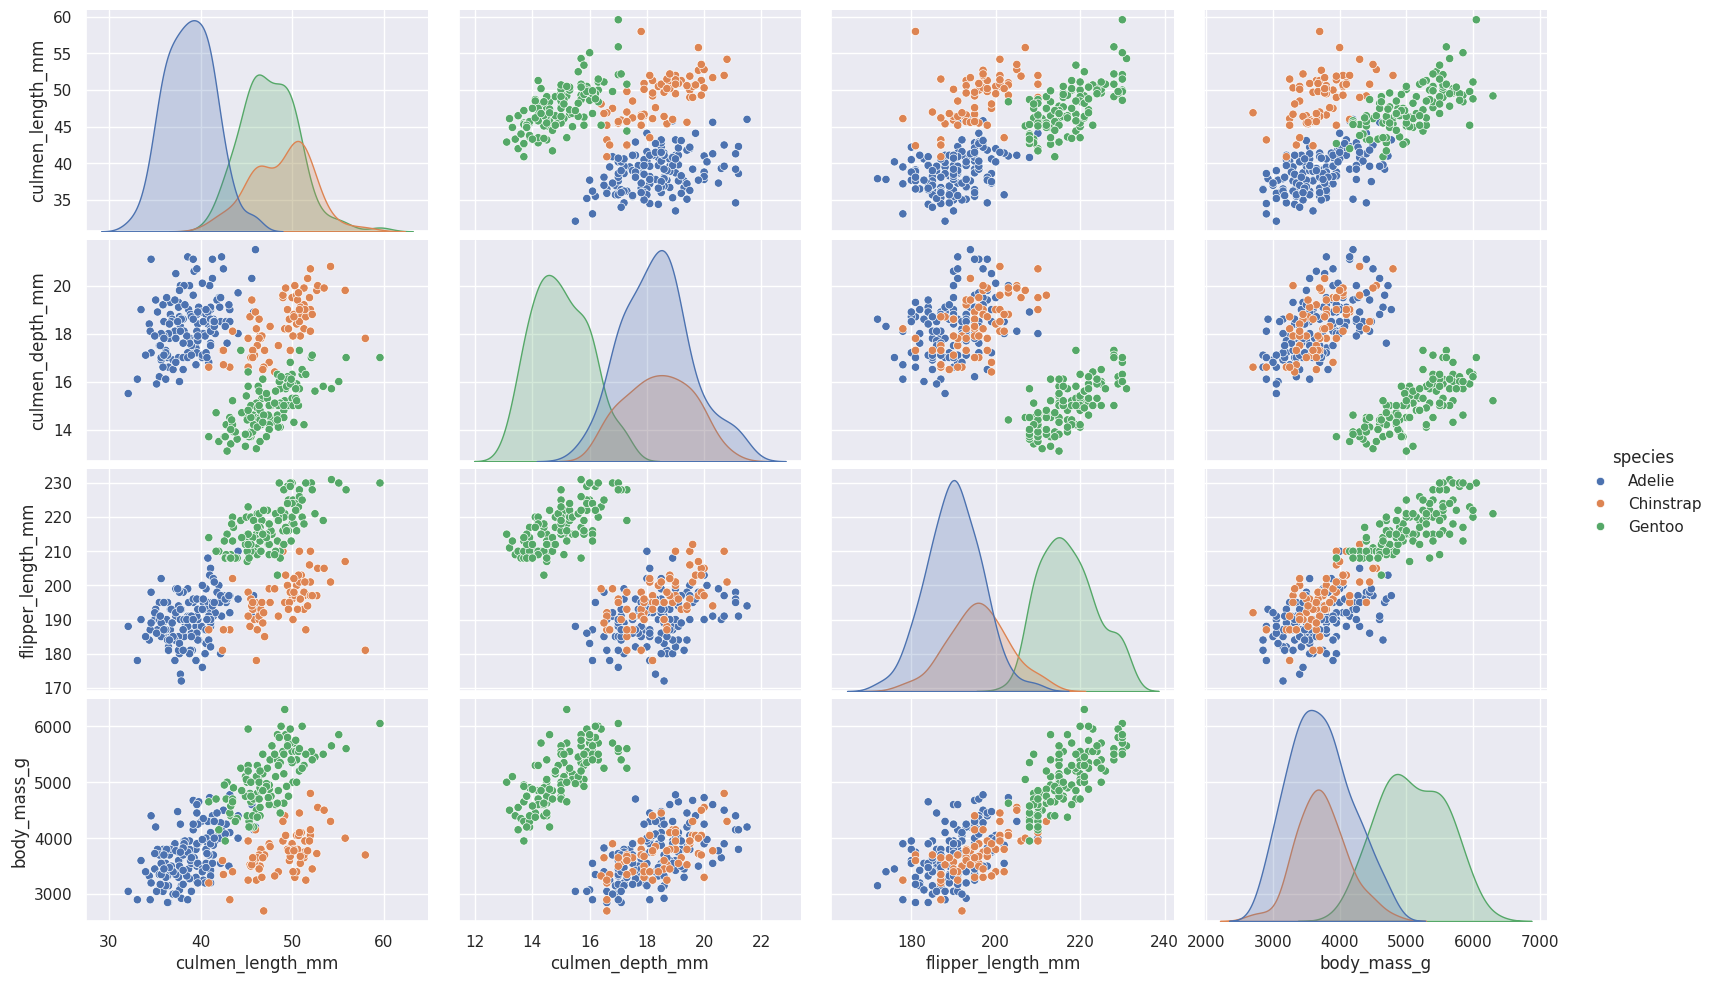

In [274]:
# Checking relationships between variables
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue="species", height=2.5, aspect=1.6)
plt.show()


In [209]:
#encoding categorial features and labels
encode = LabelEncoder()
df["sex"] = encode.fit_transform(df["sex"])
df["island"] = encode.fit_transform(df["island"])
df["species"] = encode.fit_transform(df["species"])

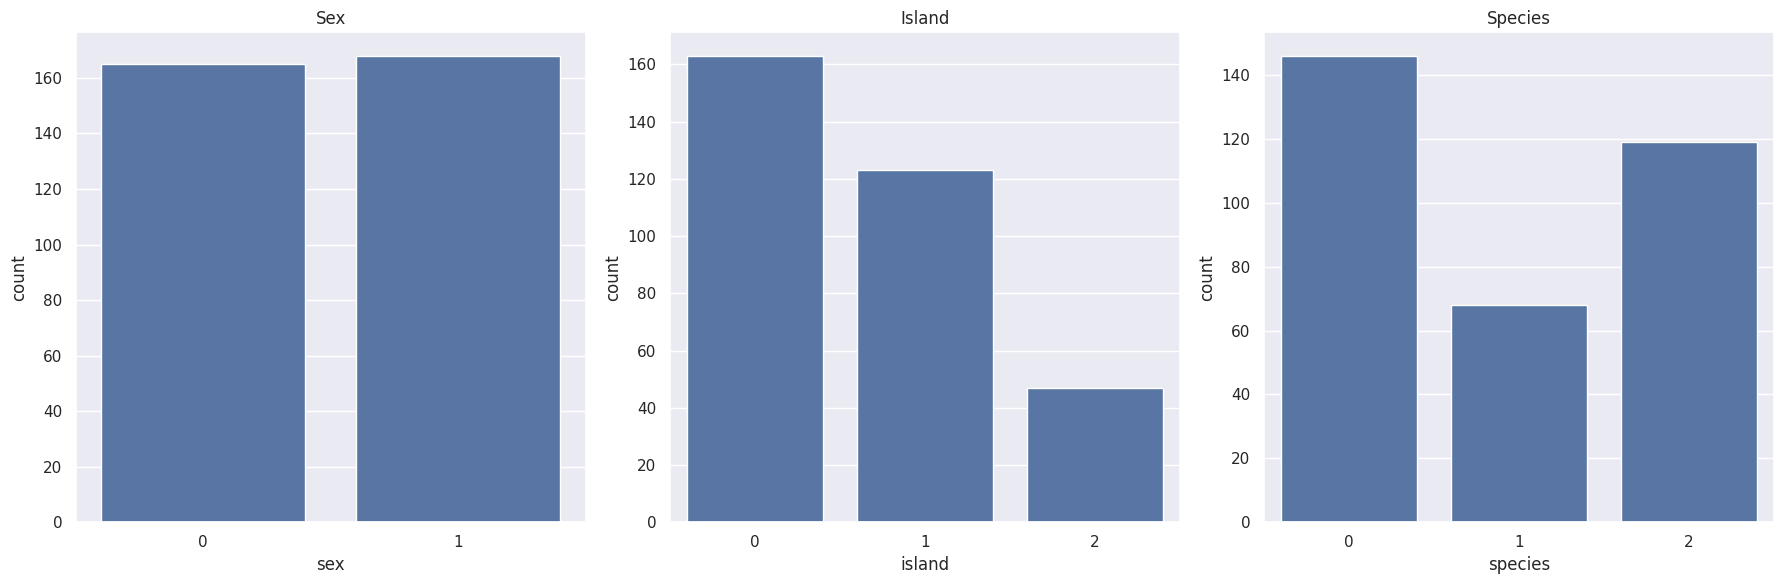

In [210]:
# inspecting all of categorial features and target after encoding
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x="sex")
plt.title("Sex")

plt.subplot(1, 3, 2)
sns.countplot(data=df, x="island")
plt.title("Island")

plt.subplot(1, 3, 3)
sns.countplot(data=df, x="species")
plt.title("Species")

plt.tight_layout()
plt.show()

In [211]:
#splitting data for features and target cols
X = df.drop("species", axis = 1)
y = df["species"]

In [212]:
#splitting data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [213]:
#scaling features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#decision tree

In [214]:
#initializing and training model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [222]:
#inspecting key metrics
print("accuracy score:", accuracy_score(y_test, pred_clf))
print("precision score:", precision_score(y_test, pred_clf, average='weighted'))
print("recall score:", recall_score(y_test, pred_clf, average='weighted'))
print("f1 score:", f1_score(y_test, pred_clf, average='weighted'))

accuracy score: 0.9850746268656716
precision score: 0.986140724946695
recall score: 0.9850746268656716
f1 score: 0.9852286835404036


In [223]:
#creating param_grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [224]:
#initializing GridSeachCV for tuning
clf_grid =  GridSearchCV(estimator=clf, param_grid=param_grid, scoring="accuracy", cv=5)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [225]:
#retriving best model and best parameters
best_model = clf_grid.best_estimator_
best_params = clf_grid.best_params_

In [226]:
#predicitng with the best model
pred_best_model = best_model.predict(X_test)

In [227]:
#classification_report
print(classification_report(y_test, pred_best_model))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



In [228]:
#confusion_matrix
print(confusion_matrix(y_test, pred_best_model))

[[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]


#random forest classifier


In [229]:
#initializing and training model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [230]:
#inspecting key metrics
print("accuracy score:", accuracy_score(y_test, pred_rfc))
print("precision score:", precision_score(y_test, pred_rfc, average='weighted'))
print("recall score:", recall_score(y_test, pred_rfc, average='weighted'))
print("f1 score:", f1_score(y_test, pred_rfc, average='weighted'))

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0


In [231]:
#classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [232]:
#confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


#support vector model

In [237]:
#initializing and training model
svc = svm.SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

In [238]:
#inspecting key metrics
print("accuracy score:", accuracy_score(y_test, pred_svc))
print("precision score:", precision_score(y_test, pred_svc, average='weighted'))
print("recall score:", recall_score(y_test, pred_svc, average='weighted'))
print("f1 score:", f1_score(y_test, pred_svc, average='weighted'))

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0


In [239]:
#classification_report
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [240]:
#confusion_matrix
print(confusion_matrix(y_test, pred_svc))

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


#KNN

In [244]:
#initializing and training model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [242]:
#inspecting key metrics
print("accuracy score:", accuracy_score(y_test, pred_knn))
print("precision score:", precision_score(y_test, pred_knn, average='weighted'))
print("recall score:", recall_score(y_test, pred_knn, average='weighted'))
print("f1 score:", f1_score(y_test, pred_knn, average='weighted'))

accuracy score: 0.9850746268656716
precision score: 0.986140724946695
recall score: 0.9850746268656716
f1 score: 0.9852286835404036


In [245]:
#creating param_grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [246]:
#initializing GridSeachCV for tuning
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring="accuracy", cv=5)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [248]:
#retriving best model and best parameters
best_model = knn_grid.best_estimator_
best_params = knn_grid.best_params_

In [249]:
#predicitng with the best model
pred_best_model = best_model.predict(X_test)

In [250]:
#classification_report
print(classification_report(y_test, pred_best_model))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [251]:
#confusion_matrix
print(confusion_matrix(y_test, pred_best_model))

[[30  1  0]
 [ 0 13  0]
 [ 0  0 23]]


# neural network model

In [254]:
MLP = MLPClassifier(max_iter=1000)
MLP.fit(X_train, y_train)
pred_MLP = MLP.predict(X_test)

In [255]:
#inspecting key metrics
print("accuracy score:", accuracy_score(y_test, pred_MLP))
print("precision score:", precision_score(y_test, pred_MLP, average='weighted'))
print("recall score:", recall_score(y_test, pred_MLP, average='weighted'))
print("f1 score:", f1_score(y_test, pred_MLP, average='weighted'))

accuracy score: 1.0
precision score: 1.0
recall score: 1.0
f1 score: 1.0


In [256]:
#classification_report
print(classification_report(y_test, pred_MLP))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [257]:
#confusion_matrix
print(confusion_matrix(y_test, pred_MLP))

[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
